In [1]:
import numpy as np
import matplotlib.pyplot as plt
import phoebe
import matplotlib.cbook
import warnings
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings('ignore')
logger = phoebe.logger('WARNING')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
phoebe.__version__

'workshop2021'

In [30]:
b.references()

{'Prsa et al. (2016)': {'url': 'https://ui.adsabs.harvard.edu/abs/2016ApJS..227...29P',
  'uses': ['general PHOEBE 2 framework', 'PHOEBE 2 compute backend']},
 'Maxted (2016)': {'url': 'https://ui.adsabs.harvard.edu/abs/2016A%26A...591A.111M',
  'uses': ['ellc compute backend']},
 'Conroy et al. (2020)': {'url': 'https://ui.adsabs.harvard.edu/abs/2020ApJS..250...34C',
  'uses': ['general inverse problem framework in PHOEBE',
   'rv_geometry solver',
   'lc_geometry solver']},
 'astropy': {'url': 'https://www.astropy.org/acknowledging.html',
  'uses': ['astropy.timeseries for periodograms',
   'astropy dependency within PHOEBE']},
 'Prsa et al. (2008)': {'url': 'https://ui.adsabs.harvard.edu/abs/2008ApJ...687..542P',
  'uses': ['ebai solver backend']},
 'numpy/scipy': {'url': 'https://www.scipy.org/citing.html',
  'uses': ['nelder_mead solver uses scipy.optimize',
   'numpy/scipy dependency within PHOEBE']},
 'Foreman-Mackey et al. (2013)': {'url': 'https://ui.adsabs.harvard.edu/abs/201

In [3]:
b = phoebe.open('models/after_optimizers.bundle')

Mon, 20 Sep 2021 22:56 BUNDLE       WARNING 'maxfev' not a recognized kwarg


In [4]:
phoebe.u._physical_types_to_solar.keys()

dict_keys(['length', 'area', 'volume', 'mass', 'temperature', 'power', 'time', 'speed', 'angle', 'angular speed', 'dimensionless'])

In [5]:
b.models

['after_estimators', 'after_nm']

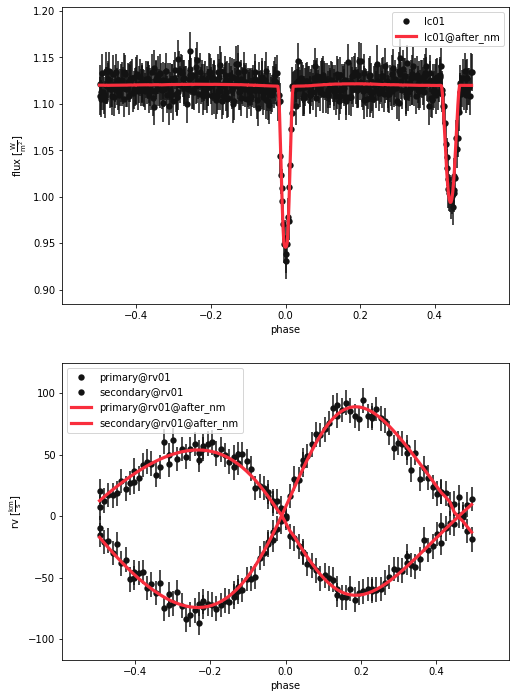

In [6]:
_ = b.plot(x='phases', 
           model='after_nm',
           c={'after_estimators': 'red', 'after_nm': 'red', 'dataset': 'black'}, 
           linestyle={'after_estimators': 'dashed', 'after_nm': 'solid'},
           marker={'dataset': '.'}, show=True,legend=True)

In [7]:
print(b.filter('ld_coeffs'))

ParameterSet: 4 parameters
   ld_coeffs@primary@lc01@dataset: [0.5 0.5]
   ld_coeffs@secondary@lc01@da...: [0.5 0.5]
   ld_coeffs@primary@rv01@dataset: [0.5 0.5]
   ld_coeffs@secondary@rv01@da...: [0.5 0.5]


In [8]:
b.set_value_all('atm','phoenix')
print(b.filter('atm'))

ParameterSet: 4 parameters
     atm@primary@phoebe01@compute: phoenix
   atm@secondary@phoebe01@compute: phoenix
   atm@primary@fastcompute@com...: phoenix
   atm@secondary@fastcompute@c...: phoenix


In [9]:
b.set_value_all(qualifier='ld_mode', value='manual')
b.set_value_all(qualifier='ld_func', value='square_root')
b.set_value_all(qualifier='ld_coeffs', component='primary', value=[0.039, 0.802])
b.set_value_all(qualifier='ld_coeffs', component='secondary', value=[0.023, 0.810])

In [10]:
b.set_value_all('ld_mode_bol', 'manual')
b.set_value_all('ld_func_bol','square_root')
b.set_value('ld_coeffs_bol@primary@component',[0.154, 0.500])
b.set_value('ld_coeffs_bol@secondary@component',[0.045,0.711])
b.set_value('irrad_frac_refl_bol@primary@component',0.6)
b.set_value('irrad_frac_refl_bol@secondary@component',0.6)



In [11]:
print(b.run_checks())

Run Checks Report: PASS



In [12]:
print(b.filter('passband'))

ParameterSet: 2 parameters
            passband@lc01@dataset: Johnson:V
            passband@rv01@dataset: Johnson:V


In [13]:
print(b.filter(qualifier=['ecc','teffratio','requivsumfrac', 'per0','asini','ecosw', 'teff', 'sma', 'incl', 'q', 'requiv'], context='component'))

ParameterSet: 19 parameters
         requiv@primary@component: 3.2679715862714684 solRad
           teff@primary@component: 7538.6983214449265 K
C          incl@primary@component: 93.85501459925169 deg
       requiv@secondary@component: 1.3463197163533884 solRad
         teff@secondary@component: 7208.085229057414 K
C        incl@secondary@component: 93.85501459925169 deg
            per0@binary@component: 125.30152685701964 deg
             ecc@binary@component: 0.1552366033628666
            incl@binary@component: 93.85501459925169 deg
               q@binary@component: 0.7236917869119872
             sma@binary@component: 29.94087819710599 solRad
C          asini@binary@component: 29.873133159866793 solRad
C          ecosw@binary@component: -0.08970803104430941
C           sma@primary@component: 12.570674066386424 solRad
C         asini@primary@component: 12.542231320748071 solRad
C         sma@secondary@component: 17.370204130719568 solRad
C       asini@secondary@component: 17.3309

## copy

In [14]:
b.set_value_all('pblum_mode', 'dataset-scaled')

In [15]:
pblums_scaled = b.compute_pblums(compute='fastcompute', model='after_nm')

In [16]:
print(pblums_scaled)

{'pblum@primary@lc01': <Quantity 3.33111617 W>, 'pblum@secondary@lc01': <Quantity 0.46498497 W>, 'pblum@primary@rv01': <Quantity 4.89941668e+26 W>, 'pblum@secondary@rv01': <Quantity 6.83901429e+25 W>}


In [17]:
b.set_value_all('pblum_mode', 'component-coupled')

In [18]:
b.set_value('pblum', dataset='lc01', component='primary', value=pblums_scaled['pblum@primary@lc01'])

In [19]:
print(b.compute_pblums(compute='fastcompute', dataset='lc01', pbflux=True))

{'pblum@primary@lc01': <Quantity 3.33111617 W>, 'pblum@secondary@lc01': <Quantity 0.46498497 W>, 'pbflux@lc01': <Quantity 0.30208413 W / m2>}


In [20]:
print(b.filter(qualifier=['ecc','teffratio','requivsumfrac', 'per0','asini','ecosw', 'teff', 'sma', 'incl', 'q', 'requiv'], context='component'))

ParameterSet: 19 parameters
         requiv@primary@component: 3.2679715862714684 solRad
           teff@primary@component: 7538.6983214449265 K
C          incl@primary@component: 93.85501459925169 deg
       requiv@secondary@component: 1.3463197163533884 solRad
         teff@secondary@component: 7208.085229057414 K
C        incl@secondary@component: 93.85501459925169 deg
            per0@binary@component: 125.30152685701964 deg
             ecc@binary@component: 0.1552366033628666
            incl@binary@component: 93.85501459925169 deg
               q@binary@component: 0.7236917869119872
             sma@binary@component: 29.94087819710599 solRad
C          asini@binary@component: 29.873133159866793 solRad
C          ecosw@binary@component: -0.08970803104430941
C           sma@primary@component: 12.570674066386424 solRad
C         asini@primary@component: 12.542231320748071 solRad
C         sma@secondary@component: 17.370204130719568 solRad
C       asini@secondary@component: 17.3309

In [21]:
b.add_distribution({'teff@primary': phoebe.gaussian_around(100),
                    'requiv@primary': phoebe.gaussian_around(0.05),
                    'teff@secondary': phoebe.gaussian_around(5),
                    'requiv@secondary': phoebe.gaussian_around(0.05),
                    'incl@binary': phoebe.gaussian_around(0.05),
                    'sma@binary': phoebe.gaussian_around(0.002),
                    'q': phoebe.gaussian_around(0.005),
                    'ecc': phoebe.gaussian_around(0.02),
                    'pblum': phoebe.uniform_around(0.5)},
                    distribution='ball_around_optimized_solution',overwrite_all=True)

<ParameterSet: 9 parameters | components: primary, secondary, binary>

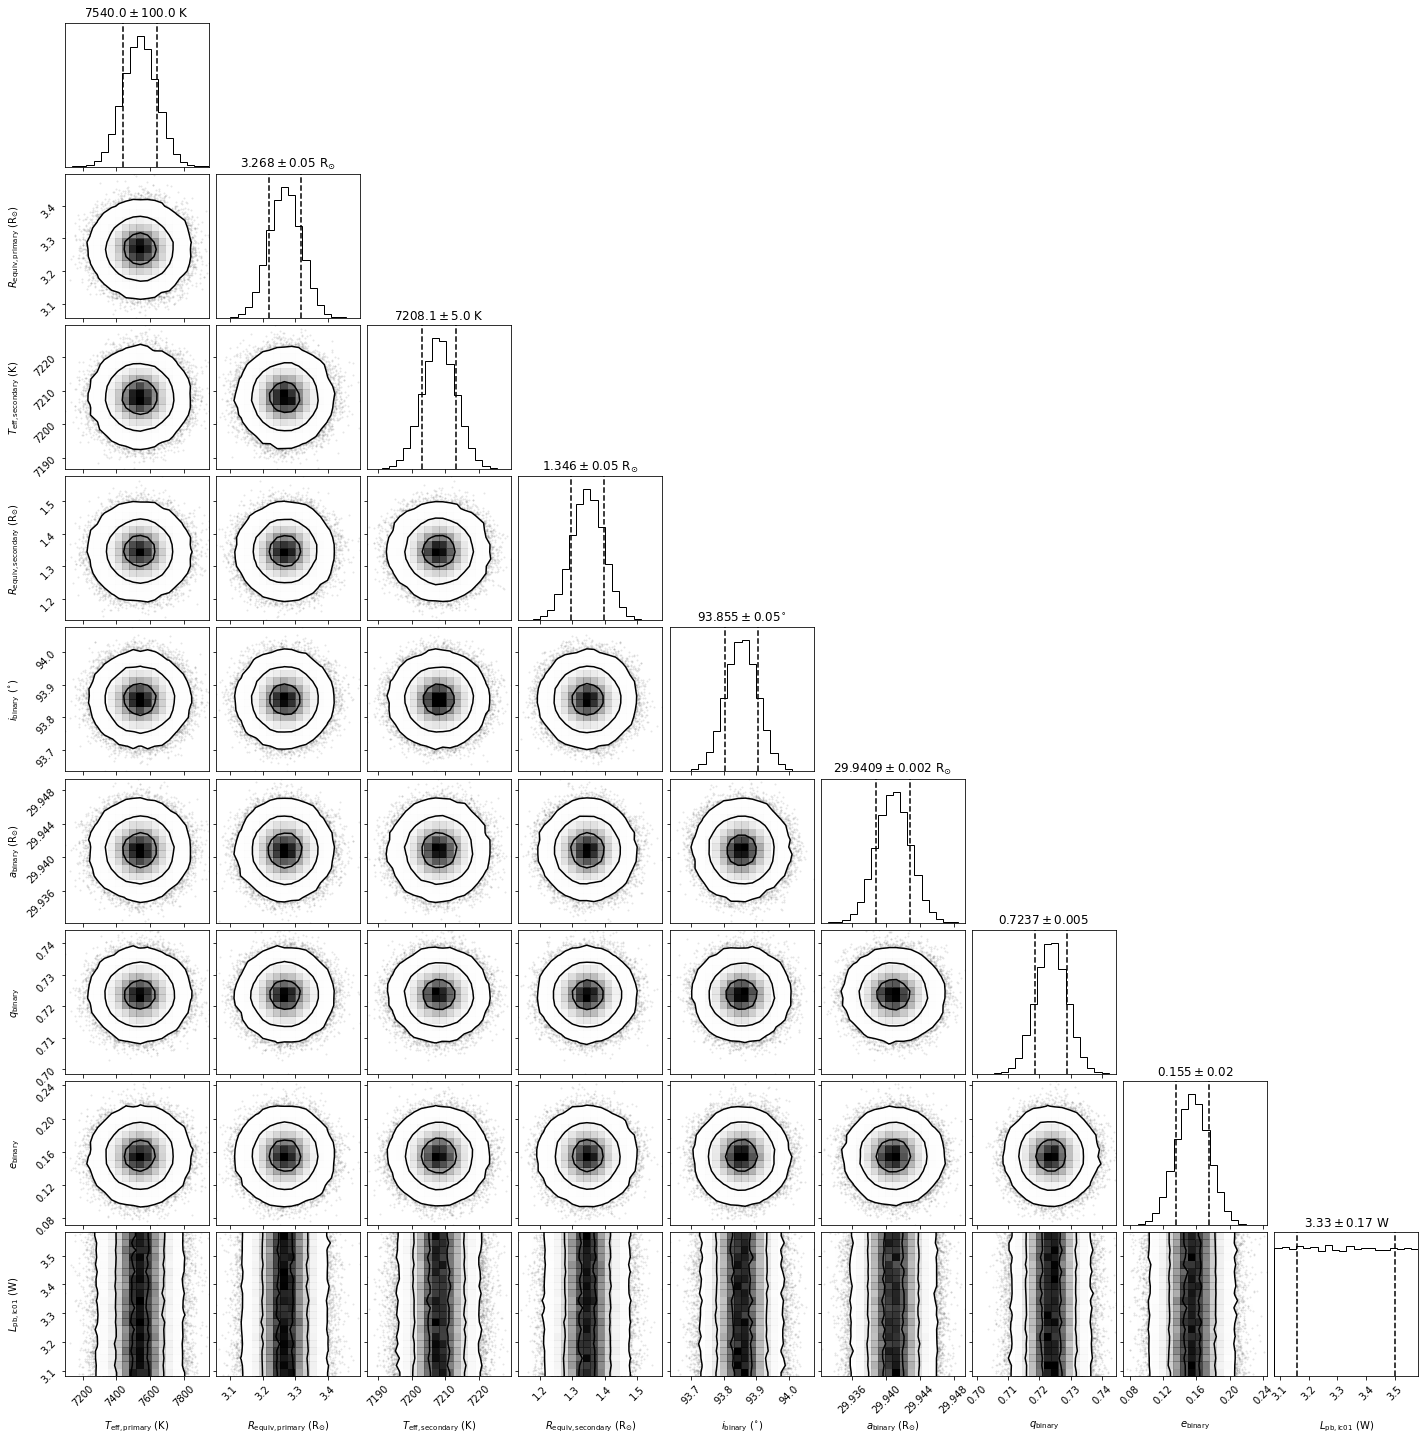

In [22]:
_ = b.plot_distribution_collection('ball_around_optimized_solution', show=True)

In [23]:
print(b.filter('ld_mode'))

ParameterSet: 4 parameters
     ld_mode@primary@lc01@dataset: manual
   ld_mode@secondary@lc01@dataset: manual
     ld_mode@primary@rv01@dataset: manual
   ld_mode@secondary@rv01@dataset: manual


In [24]:
b.add_solver('sampler.emcee',
             init_from='ball_around_optimized_solution',
             compute='fastcompute',
             nwalkers=25,
             solver='emcee_solver',overwrite=True)

<ParameterSet: 16 parameters | qualifiers: expose_failed, init_from_combine, priors, burnin_factor, continue_from, priors_combine, progress_every_niters, compute, init_from, nwalkers, use_server, niters, thin_factor, nlags_factor, comments, init_from_requires>

In [25]:
print(b.filter('emcee_solver'))

ParameterSet: 15 parameters
     comments@emcee_solver@solver: 
   use_server@emcee_solver@solver: compute
      compute@emcee_solver@solver: fastcompute
   continue_from@emcee_solver@...: None
    init_from@emcee_solver@solver: ['ball_around_optimized_solution']
   init_from_combine@emcee_sol...: first
   init_from_requires@emcee_so...: ['limits', 'priors']
       priors@emcee_solver@solver: []
     nwalkers@emcee_solver@solver: 25
       niters@emcee_solver@solver: 100
   burnin_factor@emcee_solver@...: 2.0
   thin_factor@emcee_solver@so...: 0.5
   nlags_factor@emcee_solver@s...: 3.0
   progress_every_niters@emcee...: 0
   expose_failed@emcee_solver@...: True


In [26]:
print(b.run_checks())

Run Checks Report: WARNING


In [27]:
b.run_solver('emcee_solver', solution='round_1',overwrite=True)

Mon, 20 Sep 2021 23:12 BUNDLE       WARNING pblum_method=stefan-boltzmann is an approximation, fitting for pblum may not be reliable.  Consider removing from init_from or setting pblum_method='phoebe' (more expensive).
  6%|████▌                                                                      | 6/100 [01:58<30:49, 19.68s/it]Mon, 20 Sep 2021 23:15 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8128K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Mon, 20 Sep 2021 23:15 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8128K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
  9%|██████▊                                                                    | 9/100 [02:55<29:04, 19.17s/it]Mon, 20 Sep 2021 23:16 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=8217K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.3

<ParameterSet: 20 parameters | qualifiers: adopt_parameters, fitted_units, nwalkers, burnin, fitted_twigs, lnprobabilities, acceptance_fractions, nlags, thin, wrap_central_values, adopt_values, failed_samples, lnprob_cutoff, samples, distributions_convert, autocorr_times, progress, niters, adopt_distributions, comments>

## compute

In [86]:
b.run_compute(compute='fastcompute', sample_from='ball_around_optimized_solution', sample_num=100, model='from_ndg', overwrite=True)

Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 252.32679665039905 deg
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 247.93869399062703 deg
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 248.46193928607468 deg
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 252.15174489354965 deg
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 252.66103874498185 deg
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 249.54120670336903 deg
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 251.86849184871613 deg
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 250.8474061575309 deg
100%|█████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.52it/s]
Wed, 15 Sep 2021 05:50 PARAMETERS   WARNING wrapping value of mean_anom to 249.2738583966616 deg
Wed, 15

<ParameterSet: 13 parameters | kinds: rv, lc>

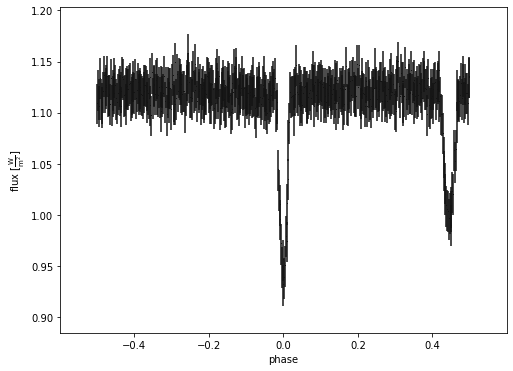

ValueError: Nothing could be found to plot.  Check all arguments.

In [28]:
_=b.plot(model='from_ndg', x='phase',dataset='lc01',marker=',', show=True)
_=b.plot(model='from_ndg', x='phase',y='residuals',dataset='lc01', show=True)


## .

In [41]:
b.uncertainties_from_distribution_collection(solution='round_1',tex=True)

teff@primary = 7900.0 +3100.0 -1200.0  K
requiv@primary = 1.9 +2.89 -0.76  solRad
teff@secondary = 7170.0 +270.0 -110.0  K
requiv@secondary = 1.95 +0.79 -1.58  solRad
incl@binary = 93.4 +1.1 -2.0  deg
sma@binary = 29.926 +0.05 -0.014  solRad
q@binary = 0.742 +0.224 -0.086  
ecc@binary = 0.31 +0.2 -0.15  
pblum@lc01 = 5.6 +7.6 -3.4  W

(None, <Figure size 1454.4x1454.4 with 81 Axes>)

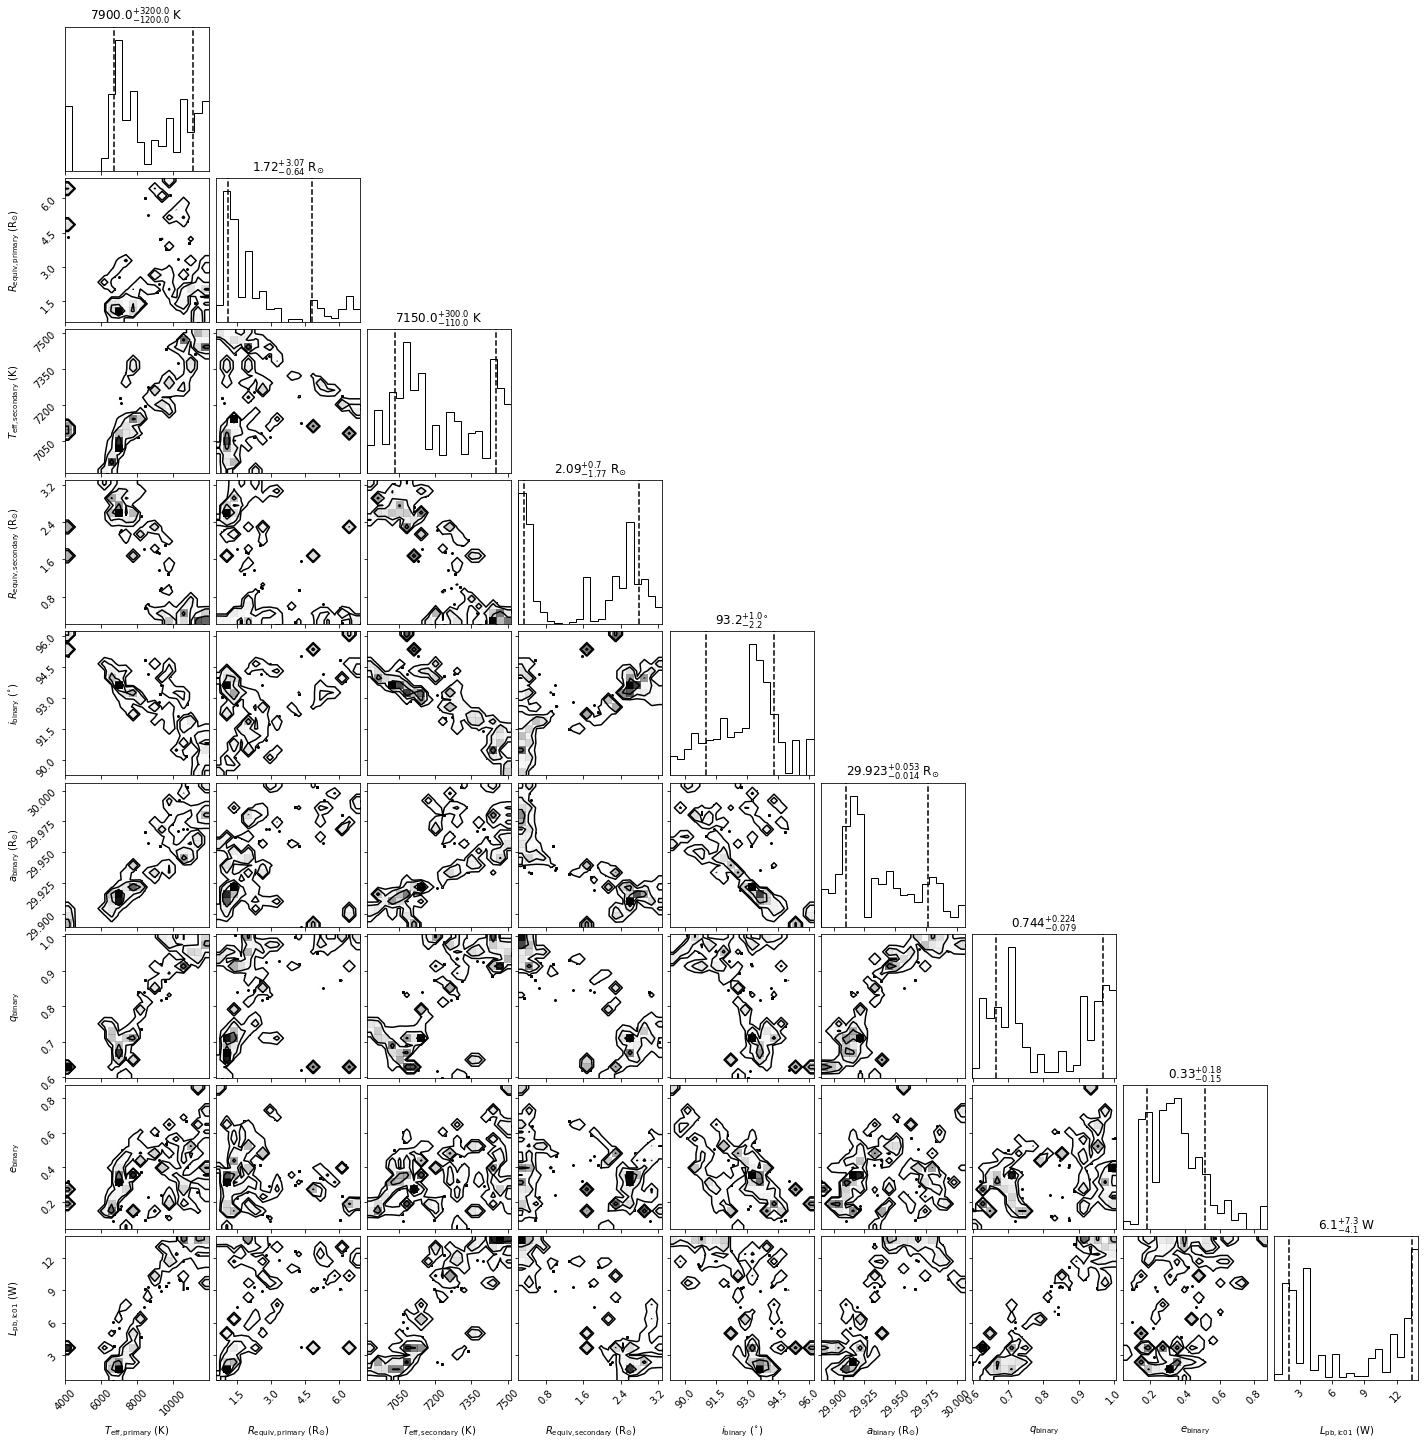

In [42]:
b.plot(solution='round_1', style='corner', burnin=50, thin=1, show=True)

In [105]:
b['continue_from@emcee_solver'] = 'round_1'

In [106]:
b['niters@emcee_solver@solver'] = 50

In [107]:
print(b['emcee_solver'])

ParameterSet: 28 parameters
     comments@emcee_solver@solver: 
      compute@emcee_solver@solver: fastcompute
   continue_from@emcee_solver@...: round_1
       priors@emcee_solver@solver: []
       niters@emcee_solver@solver: 50
   burnin_factor@emcee_solver@...: 2.0
   thin_factor@emcee_solver@so...: 0.5
   progress_every_niters@emcee...: 0
R  wrap_central_values@round_1...: {'CuiObKepDGhFWuINIrBarUoljqEgiJ': 93.85501459925169}
R  fitted_uniqueids@emcee_solv...: ['iZqESNiYuuSRHbXmwKNbWzceRxwBnH' 'ClTqAJTgfwiCGrPeeyNhXVNCErjWnw'
 'EqhWmhIpGFDKczEgPsBVrCauKlsFrf' 'QfcXVyGFeXbhSzJBVphHWJNewxrHaW'
 'CuiObKepDGhFWuINIrBarUoljqEgiJ' 'rgcHEEQGixaggRfZIwnYzsdYOvBewK'
 'ZjfgWTQZMCXTDTkFXVKbDPQkgURHlG' 'OOPcspvrWJOcWCVFyEUCVdoJVbnWoK']
R  fitted_twigs@emcee_solver@r...: ['teff@primary@star@component' 'requiv@primary@star@component'
 'teff@secondary@star@component' 'requiv@secondary@star@component'
 'incl@binary@orbit@component' 'sma@binary@orbit@component'
 'q@binary@orbit@component' 'ecc@bina

In [125]:
b.run_solver('emcee_solver', solution='round_2')

Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 257.28234763917027 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 254.43088369276086 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 255.358390089495 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 258.2177172139748 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 249.221598529605 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 253.86119374739116 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 257.08477320246396 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 253.6140824417242 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 257.5674190621853 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 258.1277942082131 deg
Sat, 11 Sep 2021 16:39 PARAM

<ParameterSet: 20 parameters | qualifiers: samples, lnprobabilities, fitted_uniqueids, niters, comments, acceptance_fractions, burnin, nwalkers, adopt_distributions, adopt_values, fitted_units, autocorr_times, adopt_parameters, thin, lnprob_cutoff, progress, distributions_convert, wrap_central_values, fitted_twigs, failed_samples>

## RV-sampling

In [104]:
b.add_compute(kind='ellc',compute='dyn_rv',overwrite=True)
b['enabled@lc01@dyn_rv'] = False

b.flip_constraint('teffratio',solve_for='teff@secondary')

In [99]:
b.add_distribution({
    'asini@orbit': phoebe.gaussian_around(0.05),
    'q@binary': phoebe.gaussian_around(0.05),
    'vgamma@system': phoebe.gaussian_around(5.0),
    'ecc@orbit': phoebe.gaussian_around(0.05),
    'per0@orbit': phoebe.gaussian_around(5.0)
}, distribution='ndg', overwrite_all=True)

<ParameterSet: 5 parameters | qualifiers: q, ecc, per0, vgamma, asini>

b.add_distribution({'teffratio': phoebe.gaussian_around(0.05),
                    'teff@primary': phoebe.gaussian_around(10),
                    'requiv@secondary': phoebe.gaussian_around(0.05),
                    'asini@binary': phoebe.gaussian_around(0.05),
                    'incl@binary': phoebe.gaussian_around(0.03),
                    'q': phoebe.gaussian_around(0.05),
                    'ecc': phoebe.gaussian_around(0.05)},
                    distribution='ndg',overwrite_all=True)

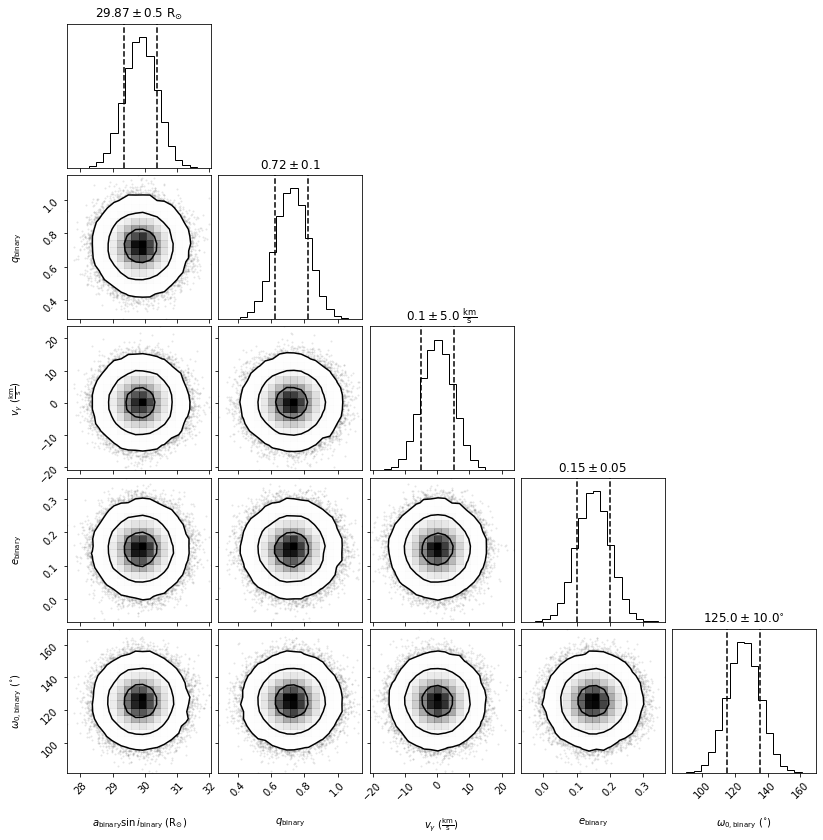

In [74]:
_=b.plot_distribution_collection('ndg',show=True)

In [100]:
b.run_compute(compute='dyn_rv', sample_from='ndg', sample_num=50, model='from_ndg', overwrite=True)

Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 257.91353331070786 deg
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 255.18869292253459 deg
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 254.58240886439322 deg
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 250.10768710319633 deg
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 245.08256667158622 deg
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 243.99376334730766 deg
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 259.3053293601019 deg
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 242.76144190033548 deg
100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 15.91it/s]
Sat, 11 Sep 2021 15:53 PARAMETERS   WARNING wrapping value of mean_anom to 255.08510151780953 deg
Sat, 1

<ParameterSet: 10 parameters | components: secondary, primary>

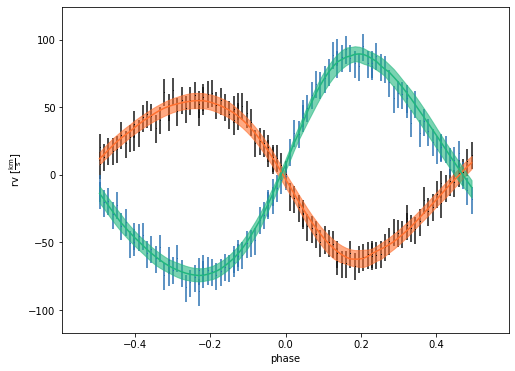

Sat, 11 Sep 2021 15:54 PARAMETERS   WARNING using median for interpolation for sample_mode='1-sigma'
Sat, 11 Sep 2021 15:54 PARAMETERS   WARNING using median for interpolation for sample_mode='1-sigma'


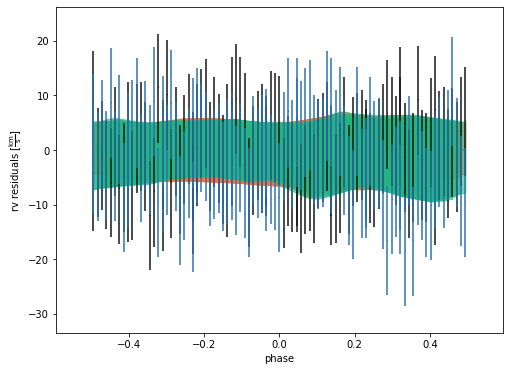

In [101]:
_=b.plot(model='from_ndg', x='phase',dataset='rv01', show=True)
_=b.plot(model='from_ndg', x='phase',y='residuals',dataset='rv01', show=True)


In [109]:
b.add_solver('sampler.emcee', solver='mcmc', compute='dyn_rv', init_from='ndg',overwrite=True)

<ParameterSet: 13 parameters | qualifiers: priors, nwalkers, burnin_factor, priors_combine, thin_factor, progress_every_niters, init_from_combine, continue_from, init_from, niters, expose_failed, comments, compute>

In [110]:
b.run_solver('mcmc', solution='round_1')

Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 244.77496499117132 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 252.29192760395648 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 248.88325865596562 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 251.8657428686426 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 252.19258230679048 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 254.69536021381424 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 251.85500112364952 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 253.0195976542164 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 252.45754084834826 deg
Sat, 11 Sep 2021 15:58 PARAMETERS   WARNING wrapping value of mean_anom to 255.51471698861226 deg
Sat, 11 Sep 2021 15:58

<ParameterSet: 20 parameters | qualifiers: samples, lnprobabilities, fitted_uniqueids, niters, comments, acceptance_fractions, burnin, nwalkers, adopt_distributions, adopt_values, fitted_units, autocorr_times, adopt_parameters, thin, lnprob_cutoff, progress, distributions_convert, wrap_central_values, fitted_twigs, failed_samples>

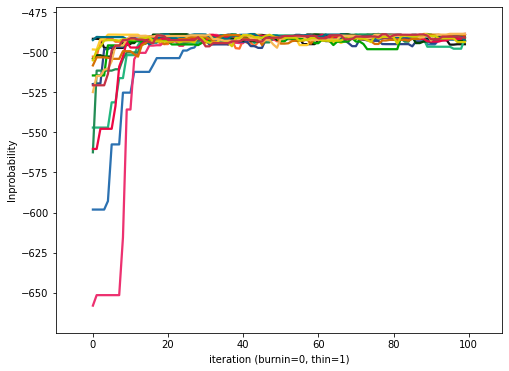

(<autofig.figure.Figure | 1 axes | 16 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [115]:
b.plot(solution='round_1', style='lnprobability', burnin=0, thin=1, show=True)

(None, <Figure size 849.6x849.6 with 25 Axes>)

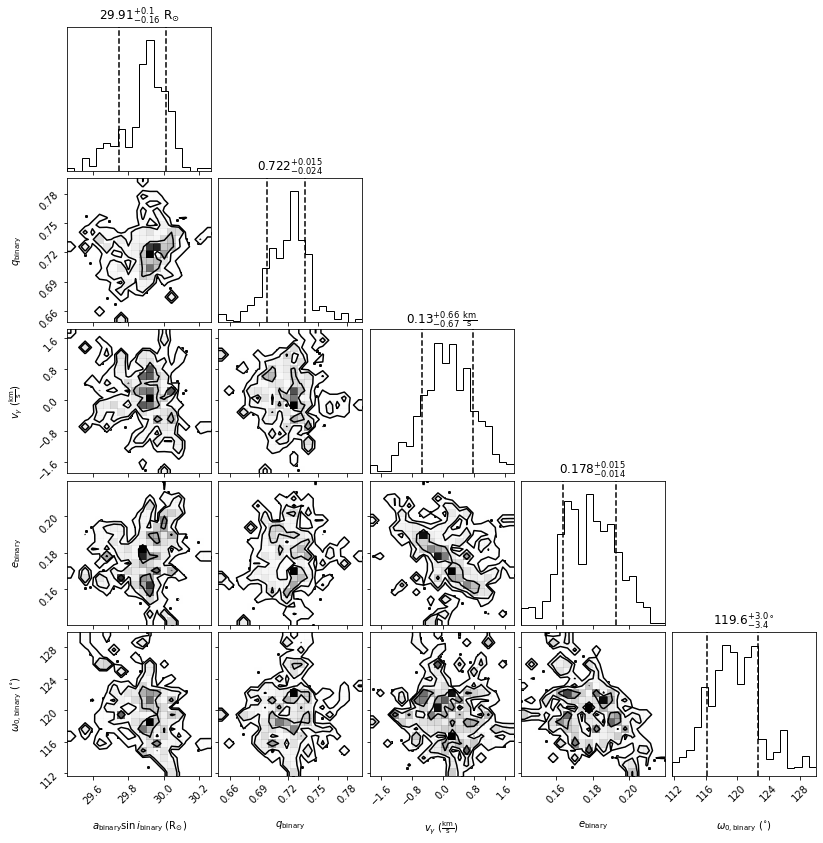

In [122]:
b.plot(solution='round_1', style='corner', burnin=50, thin=1, show=True)

In [118]:
b.run_compute(compute='dyn_rv', sample_from='round_1', sample_num=25, model='from_posteriors')

Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 255.77765106822582 deg
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 256.45999508592496 deg
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 257.93089211133537 deg
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 259.1426062972501 deg
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 261.89968468788135 deg
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 256.8168821964691 deg
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 252.0420779648536 deg
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 252.91000091533135 deg
100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 16.27it/s]
Sat, 11 Sep 2021 16:33 PARAMETERS   WARNING wrapping value of mean_anom to 252.97265271617647 deg
Sat, 11 

<ParameterSet: 10 parameters | components: secondary, primary>

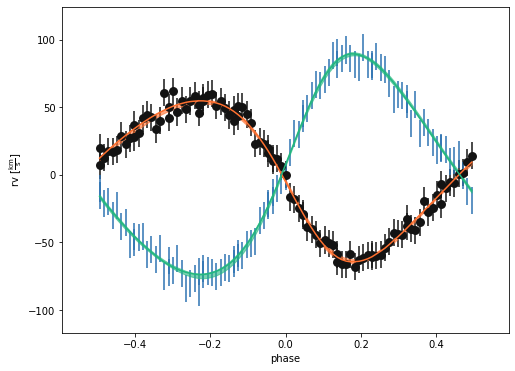

(<autofig.figure.Figure | 1 axes | 4 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [119]:
b.plot(model='from_posteriors', x='phase', show=True)

In [123]:
b['continue_from@mcmc'] = 'round_1'

In [124]:
b['niters@mcmc@solver'] = 50

In [125]:
b.run_solver('mcmc', solution='round_2')

Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 257.28234763917027 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 254.43088369276086 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 255.358390089495 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 258.2177172139748 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 249.221598529605 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 253.86119374739116 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 257.08477320246396 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 253.6140824417242 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 257.5674190621853 deg
Sat, 11 Sep 2021 16:39 PARAMETERS   WARNING wrapping value of mean_anom to 258.1277942082131 deg
Sat, 11 Sep 2021 16:39 PARAM

<ParameterSet: 20 parameters | qualifiers: samples, lnprobabilities, fitted_uniqueids, niters, comments, acceptance_fractions, burnin, nwalkers, adopt_distributions, adopt_values, fitted_units, autocorr_times, adopt_parameters, thin, lnprob_cutoff, progress, distributions_convert, wrap_central_values, fitted_twigs, failed_samples>

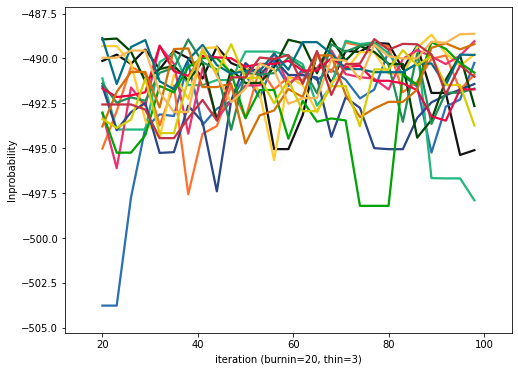

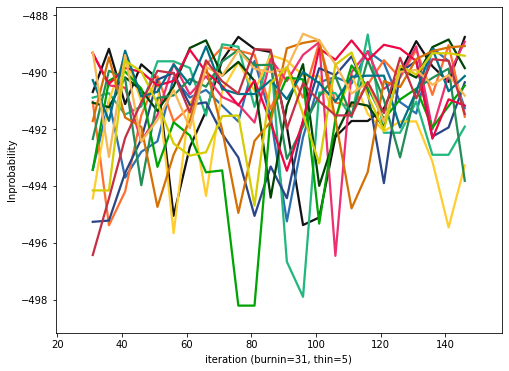

(<autofig.figure.Figure | 1 axes | 16 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [126]:
b.plot(solution='round_1', style='lnprobability', show=True)
b.plot(solution='round_2', style='lnprobability', show=True)